In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.impute import SimpleImputer as SI

In [2]:
sample = {}
sample1 = pd.read_table("data/sample/sample1.txt",header=None)
sample2 = pd.read_table("data/sample/sample2.txt",header=None)
sample3 = pd.read_table("data/sample/sample3.txt",header=None)
sample4 = pd.read_table("data/sample/sample4.txt",header=None)
sample5 = pd.read_table("data/sample/sample5.txt",header=None)
sample6 = pd.read_table("data/sample/sample6.txt",header=None)
sample7 = pd.read_table("data/sample/sample7.txt",header=None)
sample8 = pd.read_table("data/sample/sample8.txt",header=None)
sample9 = pd.read_table("data/sample/sample9.txt",header=None)
sample10 = pd.read_table("data/sample/sample10.txt",header=None)
sample11 = pd.read_table("data/sample/sample11.txt",header=None)
sample12 = pd.read_table("data/sample/sample12.txt",header=None)
sample13 = pd.read_table("data/sample/sample13.txt",header=None)
sample14 = pd.read_table("data/sample/sample14.txt",header=None)
sample = {1:sample1,2:sample2,3:sample3,4:sample4\
         ,5:sample5,6:sample6,7:sample7,8:sample8\
         ,9:sample9,10:sample10,11:sample11,12:sample12\
         ,13:sample13,14:sample14}

In [3]:
sample[1]

,0,1
0,5.01,2882
1,5.03,2917
2,5.05,2900
3,5.07,2857
4,5.09,2902
...,...,...
2245,49.91,409
2246,49.93,428
2247,49.95,454
2248,49.97,434


Visualize the fingerprint plot

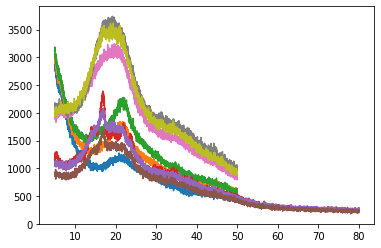

In [4]:
for i in range(1,10):
    plt.plot(sample[i][0],sample[i][1])

In [5]:
sample[1][0]

0        5.01
1        5.03
2        5.05
3        5.07
4        5.09
        ...  
2245    49.91
2246    49.93
2247    49.95
2248    49.97
2249    49.99
Name: 0, Length: 2250, dtype: float64

Abstract the first features: scale of data

In [6]:
feature1 = []
for i in range(1,15):
        norm = (sample[i][0] - np.mean(sample[i][0]))#/np.std(sample[i][0])
        norm = norm - np.mean(norm)
        feature1.append(norm[len(sample[i][0])-1])
    #feature1.append(sample[i][0][len(sample[i][0])-1])
feature1

[22.490000000000002,
 22.490000000000002,
 22.490000000000002,
 37.48999999999999,
 37.48999999999999,
 37.48999999999999,
 22.490000000000002,
 22.490000000000002,
 22.490000000000002,
 22.490000000000002,
 22.490000000000002,
 37.48999999999999,
 37.48999999999999,
 22.490000000000002]

Abstract the second features: top value of data from 500th points to the end

In [7]:
feature2 = []
for i in range(1,15):
    norm = (sample[i][1] - np.mean(sample[i][1]))/np.std(sample[i][1])
    feature2.append(max(norm[499:]))
    #feature2.append(max(sample[i][1][499:]))
feature2

[0.6566415796040869,
 1.2209396822822471,
 1.581912013073419,
 3.226095879229802,
 2.645019826195389,
 2.672500456412502,
 1.9635894947121524,
 2.131185690293894,
 2.0387980823664593,
 2.49097269985844,
 1.590110579965584,
 3.158465987234309,
 2.366097998269333,
 2.107109919420494]

In [8]:
feature3 = []
for i in range(1,15):
    norm = (sample[i][1][0] - np.mean(sample[i][1]))/np.std(sample[i][1])
    feature3.append(norm)
    #feature3.append(sample[i][1][0])
feature3

[3.9746329842813113,
 3.5988304063123375,
 3.0566421815565734,
 0.7604129099489774,
 0.5525663713690857,
 0.6940895951542706,
 -2.8067998070971025e-05,
 -0.08889781826270236,
 -0.0981362049214998,
 0.22854512867875265,
 1.828500461105788,
 0.699905823171187,
 0.8315163532796579,
 -0.1803889922897905]

Combine the features

In [9]:
feature = []
for i in range(0,14):
    feature.append([feature1[i],feature2[i],feature3[i]])
feature = torch.FloatTensor(feature)
feature

tensor([[ 2.2490e+01,  6.5664e-01,  3.9746e+00],
        [ 2.2490e+01,  1.2209e+00,  3.5988e+00],
        [ 2.2490e+01,  1.5819e+00,  3.0566e+00],
        [ 3.7490e+01,  3.2261e+00,  7.6041e-01],
        [ 3.7490e+01,  2.6450e+00,  5.5257e-01],
        [ 3.7490e+01,  2.6725e+00,  6.9409e-01],
        [ 2.2490e+01,  1.9636e+00, -2.8068e-05],
        [ 2.2490e+01,  2.1312e+00, -8.8898e-02],
        [ 2.2490e+01,  2.0388e+00, -9.8136e-02],
        [ 2.2490e+01,  2.4910e+00,  2.2855e-01],
        [ 2.2490e+01,  1.5901e+00,  1.8285e+00],
        [ 3.7490e+01,  3.1585e+00,  6.9991e-01],
        [ 3.7490e+01,  2.3661e+00,  8.3152e-01],
        [ 2.2490e+01,  2.1071e+00, -1.8039e-01]])

Define the expected output(Teacher)

In [10]:
train_y = [[0,0,1],
          [0,0,1],
          [0,0,1],
          [1,0,0],
          [1,0,0],
          [1,0,0],
          [0,1,0],
          [0,1,0],
          [0,1,0]]
train_y= np.argmax(train_y, axis=1)
train_y = torch.LongTensor(train_y)
train_y

tensor([2, 2, 2, 0, 0, 0, 1, 1, 1])

Set up the model's parameters

In [11]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3,out_features=3)
        self.out = nn.Linear(in_features=3,out_features=3)
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = self.out(x)
        x = F.softmax(x)
        return x

In [12]:
model = ANN()

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.1)


Training the models with the training data by 1000 epochs

In [14]:
epochs = 1000
loss_arr = []
for i in range(epochs):
    y_hat = model.forward(feature[0:9])
    loss = criterion(y_hat,train_y)
    loss_arr.append(loss)
    print(f"{i}epoch, error:{loss}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

D:\NEW\python\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


0epoch, error:1.0991036891937256
1epoch, error:1.097084641456604
2epoch, error:1.0866822004318237
3epoch, error:1.0860772132873535
4epoch, error:1.0440725088119507
5epoch, error:1.0333473682403564
6epoch, error:1.012372612953186
7epoch, error:0.9624941945075989
8epoch, error:0.9484788179397583
9epoch, error:0.912695050239563
10epoch, error:0.8767878413200378
11epoch, error:0.8564488887786865
12epoch, error:0.8274650573730469
13epoch, error:0.8091633915901184
14epoch, error:0.7823531627655029
15epoch, error:0.7691013813018799
16epoch, error:0.7479397654533386
17epoch, error:0.7366243600845337
18epoch, error:0.720153272151947
19epoch, error:0.7063832879066467
20epoch, error:0.6926621794700623
21epoch, error:0.6806854605674744
22epoch, error:0.6698925495147705
23epoch, error:0.6584881544113159
24epoch, error:0.650150716304779
25epoch, error:0.6398230791091919
26epoch, error:0.6331566572189331
27epoch, error:0.6238746047019958
28epoch, error:0.6186352968215942
29epoch, error:0.611220538616

238epoch, error:0.5525630116462708
239epoch, error:0.552556037902832
240epoch, error:0.5525491237640381
241epoch, error:0.5525421500205994
242epoch, error:0.5525352954864502
243epoch, error:0.5525286197662354
244epoch, error:0.5525218844413757
245epoch, error:0.5525152683258057
246epoch, error:0.5525085926055908
247epoch, error:0.5525020956993103
248epoch, error:0.5524956583976746
249epoch, error:0.5524892807006836
250epoch, error:0.5524828433990479
251epoch, error:0.5524766445159912
252epoch, error:0.5524703860282898
253epoch, error:0.5524642467498779
254epoch, error:0.5524580478668213
255epoch, error:0.5524519681930542
256epoch, error:0.5524459481239319
257epoch, error:0.5524399280548096
258epoch, error:0.5524340867996216
259epoch, error:0.5524281859397888
260epoch, error:0.5524223446846008
261epoch, error:0.5524165630340576
262epoch, error:0.5524108409881592
263epoch, error:0.5524052381515503
264epoch, error:0.5523995757102966
265epoch, error:0.5523940324783325
266epoch, error:0.552

473epoch, error:0.5518022179603577
474epoch, error:0.5518009066581726
475epoch, error:0.551799476146698
476epoch, error:0.5517981648445129
477epoch, error:0.5517968535423279
478epoch, error:0.5517955422401428
479epoch, error:0.5517942905426025
480epoch, error:0.5517929196357727
481epoch, error:0.5517916083335876
482epoch, error:0.5517903566360474
483epoch, error:0.5517890453338623
484epoch, error:0.5517877340316772
485epoch, error:0.551786482334137
486epoch, error:0.5517852306365967
487epoch, error:0.5517840385437012
488epoch, error:0.5517827868461609
489epoch, error:0.5517815351486206
490epoch, error:0.5517803430557251
491epoch, error:0.5517790913581848
492epoch, error:0.5517778992652893
493epoch, error:0.551776647567749
494epoch, error:0.5517753958702087
495epoch, error:0.551774263381958
496epoch, error:0.5517730712890625
497epoch, error:0.551771879196167
498epoch, error:0.5517707467079163
499epoch, error:0.551769495010376
500epoch, error:0.5517683625221252
501epoch, error:0.55176723

707epoch, error:0.5516186356544495
708epoch, error:0.5516182780265808
709epoch, error:0.5516178011894226
710epoch, error:0.5516173839569092
711epoch, error:0.551616907119751
712epoch, error:0.5516164898872375
713epoch, error:0.5516160130500793
714epoch, error:0.5516155958175659
715epoch, error:0.5516151785850525
716epoch, error:0.5516147613525391
717epoch, error:0.5516143441200256
718epoch, error:0.551613986492157
719epoch, error:0.5516135096549988
720epoch, error:0.5516130924224854
721epoch, error:0.5516126751899719
722epoch, error:0.5516123175621033
723epoch, error:0.5516117811203003
724epoch, error:0.5516114830970764
725epoch, error:0.5516110062599182
726epoch, error:0.5516106486320496
727epoch, error:0.5516102313995361
728epoch, error:0.5516098737716675
729epoch, error:0.551609456539154
730epoch, error:0.5516089797019958
731epoch, error:0.5516086220741272
732epoch, error:0.5516082048416138
733epoch, error:0.5516077876091003
734epoch, error:0.5516074299812317
735epoch, error:0.55160

941epoch, error:0.5515491366386414
942epoch, error:0.551548957824707
943epoch, error:0.5515487194061279
944epoch, error:0.5515486001968384
945epoch, error:0.5515483617782593
946epoch, error:0.5515482425689697
947epoch, error:0.5515480041503906
948epoch, error:0.5515477657318115
949epoch, error:0.551547646522522
950epoch, error:0.5515474081039429
951epoch, error:0.5515472888946533
952epoch, error:0.5515469908714294
953epoch, error:0.5515468120574951
954epoch, error:0.5515466332435608
955epoch, error:0.5515463948249817
956epoch, error:0.5515462756156921
957epoch, error:0.5515460968017578
958epoch, error:0.5515458583831787
959epoch, error:0.5515457391738892
960epoch, error:0.5515454411506653
961epoch, error:0.5515453219413757
962epoch, error:0.5515451431274414
963epoch, error:0.5515449047088623
964epoch, error:0.551544725894928
965epoch, error:0.5515444874763489
966epoch, error:0.5515444278717041
967epoch, error:0.5515442490577698
968epoch, error:0.5515440106391907
969epoch, error:0.55154

Get the final output data 

In [15]:
y_hat
0

0

Obtain the classification labels

In [26]:
predict = model(feature[9:14])
_,predict_y = torch.max(predict,1)
predict_y

D:\NEW\python\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


tensor([1, 2, 0, 0, 1])

The classification result is 3, 1, 2, 2, 3 class corresponding to 10, 11, 12, 13, 14 example 

Next, we need to abstract the features of ublabeled data

In [17]:
test = {}
test1 = pd.read_csv("data/test/test1.csv")
test2 = pd.read_csv("data/test/test2.csv")
test3 = pd.read_csv("data/test/test3.csv")
test4 = pd.read_csv("data/test/test4.csv")
test5 = pd.read_csv("data/test/test5.csv")
test6 = pd.read_csv("data/test/test6.csv")
test7 = pd.read_csv("data/test/test7.csv")
test8 = pd.read_csv("data/test/test8.csv")
test9 = pd.read_csv("data/test/test9.csv")
test10 = pd.read_csv("data/test/test10.csv")
test11 = pd.read_csv("data/test/test11.csv")
test12 = pd.read_csv("data/test/test12.csv")
test13 = pd.read_csv("data/test/test13.csv")
test14 = pd.read_csv("data/test/test14.csv")
test = {1:test1,2:test2,3:test3,4:test4\
         ,5:test5,6:test6,7:test7,8:test8\
         ,9:test9,10:test10,11:test11,12:test12\
         ,13:test13,14:test14}

In [18]:
test[1]['Var1']

0        5.01
1        5.03
2        5.05
3        5.07
4        5.09
        ...  
2245    49.91
2246    49.93
2247    49.95
2248    49.97
2249    49.99
Name: Var1, Length: 2250, dtype: float64

In [19]:
feature1_test = []
for i in range(1,15):
        #norm_test_1 = (test[i]['Var1'] - np.mean(test[i]['Var1']))/np.std(sample[i][0])
        norm_test_1 = test[i]['Var1']
        feature1_test.append(norm_test_1[len(test[i]['Var1'])-1])
    #feature1.append(sample[i][0][len(sample[i][0])-1])
feature1_test

[49.99,
 49.99,
 49.99,
 79.99,
 49.99,
 49.99,
 49.99,
 49.99,
 49.99,
 49.99,
 49.99,
 49.99,
 49.99,
 49.99]

In [20]:
feature2_test = []
for i in range(1,15):
    norm_test_2 = (test[i]['Var1'] - np.mean(test[i]['Var1']))/np.std(test[i]['Var1'])
    feature2_test.append(max(norm_test_2[499:]))
    #feature2.append(max(sample[i][1][499:]))
feature2_test

[1.7312811782007005,
 1.7312811782007005,
 1.7312811782007005,
 1.7315889889211347,
 1.7312811782007005,
 1.7312811782007005,
 1.7312811782007005,
 1.7312811782007005,
 1.7312811782007005,
 1.7312811782007005,
 1.7312811782007005,
 1.7312811782007005,
 1.7312811782007005,
 1.7312811782007005]

In [21]:
feature3_test = []
for i in range(1,15):
    #norm = test[i]['Var2'][0]
    norm_test_3 = (test[i]['Var2'][0] - np.mean(test[i]['Var2']))/np.std(test[i]['Var2'])
    feature3_test.append(norm_test_3)
    #feature3.append(sample[i][1][0])
feature3_test

[-0.798572899605298,
 0.29744511404202745,
 -0.8411547803042019,
 1.1156663292923765,
 0.03019127718517373,
 -0.21372323554769654,
 3.34296663647192,
 0.007899781173422693,
 -0.6551882863714804,
 -0.21272445801257117,
 -0.8656526315200154,
 -0.1257862470884264,
 -0.10984106747363398,
 3.6696140130678105]

In [22]:
feature_test = []
for i in range(0,14):
    feature_test.append([feature1_test[i],feature2_test[i],feature3_test[i]])
feature_test = torch.FloatTensor(feature_test)
feature_test

tensor([[ 4.9990e+01,  1.7313e+00, -7.9857e-01],
        [ 4.9990e+01,  1.7313e+00,  2.9745e-01],
        [ 4.9990e+01,  1.7313e+00, -8.4115e-01],
        [ 7.9990e+01,  1.7316e+00,  1.1157e+00],
        [ 4.9990e+01,  1.7313e+00,  3.0191e-02],
        [ 4.9990e+01,  1.7313e+00, -2.1372e-01],
        [ 4.9990e+01,  1.7313e+00,  3.3430e+00],
        [ 4.9990e+01,  1.7313e+00,  7.8998e-03],
        [ 4.9990e+01,  1.7313e+00, -6.5519e-01],
        [ 4.9990e+01,  1.7313e+00, -2.1272e-01],
        [ 4.9990e+01,  1.7313e+00, -8.6565e-01],
        [ 4.9990e+01,  1.7313e+00, -1.2579e-01],
        [ 4.9990e+01,  1.7313e+00, -1.0984e-01],
        [ 4.9990e+01,  1.7313e+00,  3.6696e+00]])

Feed the attributes to the model and gain the results

In [23]:
y = model(feature_test)
y = y.tolist()
y

D:\NEW\python\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


[[0.9988014698028564, 0.00114779535215348, 5.076229354017414e-05],
 [0.9999120235443115, 6.694250623695552e-05, 2.093136754410807e-05],
 [0.9977148771286011, 0.002222728915512562, 6.246659904718399e-05],
 [0.9999127388000488, 6.645588291576132e-05, 2.0697569198091514e-05],
 [0.9999109506607056, 6.804546865168959e-05, 2.0943964045727625e-05],
 [0.9999053478240967, 7.33042907086201e-05, 2.1392805138020776e-05],
 [0.9839090704917908, 0.000363231374649331, 0.01572773978114128],
 [0.9999107122421265, 6.825863238191232e-05, 2.0959065295755863e-05],
 [0.9997186064720154, 0.00024996930733323097, 3.142730929539539e-05],
 [0.9999053478240967, 7.326144987018779e-05, 2.1389008907135576e-05],
 [0.9965212345123291, 0.003407395211979747, 7.140864909160882e-05],
 [0.999908447265625, 7.043034565867856e-05, 2.1138997908565216e-05],
 [0.9999088048934937, 7.006352097960189e-05, 2.110711830027867e-05],
 [0.9070138931274414, 0.000556345796212554, 0.09242980182170868]]

Save the processed results to .csv file

In [24]:
sum1 = []
sum2 = []
sum3 = []
sum_all = []
for i in range(0,14):
    sum1.append(y[i][0])
    sum2.append(y[i][1])
    sum3.append(y[i][2])
    sum_all.append([sum1[i],sum2[i],sum3[i]])
sum_all = pd.DataFrame(sum_all)
sum_all.to_csv("feature2_2.csv",index=False,sep=",")
sum_all


,0,1,2
0,0.998801,0.001148,0.000051
1,0.999912,0.000067,0.000021
2,0.997715,0.002223,0.000062
3,0.999913,0.000066,0.000021
4,0.999911,0.000068,0.000021
5,0.999905,0.000073,0.000021
6,0.983909,0.000363,0.015728
7,0.999911,0.000068,0.000021
8,0.999719,0.000250,0.000031
9,0.999905,0.000073,0.000021


In [25]:
#norm1 = []
#norm2 = []
#norm3 = []
#norm = []
#for i in range(0,14):
#    norm1.append((sum1[i] - np.mean(sum1))/np.std(sum1))
#    norm2.append((sum2[i] - np.mean(sum2))/np.std(sum2))
#    norm3.append((sum3[i] - np.mean(sum3))/np.std(sum3))
#    norm.append([norm1[i],norm2[i],norm3[i]])
#
#norm = pd.DataFrame(norm)
#norm.to_csv("feature2.csv",index=False,sep=',')
#norm